In [1]:
# import library
import pandas as pd
import numpy as np

In [4]:
data = pd.read_csv('csgo.csv')
data

,time_left,ct_score,t_score,map,bomb_planted,ct_health,t_health,ct_armor,t_armor,ct_money,t_money,ct_helmets,t_helmets,round_winner
0,175.00,0.0,0.0,de_dust2,False,500.0,500.0,0.0,0.0,4000.0,4000.0,0.0,0.0,CT
1,156.03,0.0,0.0,de_dust2,False,500.0,500.0,400.0,300.0,600.0,650.0,0.0,0.0,CT
2,96.03,0.0,0.0,de_dust2,False,391.0,400.0,294.0,200.0,750.0,500.0,0.0,0.0,CT
3,76.03,0.0,0.0,de_dust2,False,391.0,400.0,294.0,200.0,750.0,500.0,0.0,0.0,CT
4,174.97,1.0,0.0,de_dust2,False,500.0,500.0,192.0,0.0,18350.0,10750.0,0.0,0.0,CT
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1995,74.90,7.0,10.0,de_train,False,327.0,355.0,376.0,183.0,6350.0,13300.0,3.0,1.0,T
1996,31.23,7.0,10.0,de_train,True,227.0,152.0,276.0,183.0,5000.0,7900.0,2.0,1.0,T
1997,11.23,7.0,10.0,de_train,True,185.0,105.0,266.0,183.0,5300.0,4450.0,2.0,1.0,T
1998,174.91,7.0,11.0,de_train,False,500.0,500.0,55.0,0.0,14900.0,32000.0,0.0,0.0,T


In [5]:
# desripsi statistik
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 14 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   time_left     2000 non-null   float64
 1   ct_score      2000 non-null   float64
 2   t_score       2000 non-null   float64
 3   map           2000 non-null   object 
 4   bomb_planted  2000 non-null   bool   
 5   ct_health     2000 non-null   float64
 6   t_health      2000 non-null   float64
 7   ct_armor      2000 non-null   float64
 8   t_armor       2000 non-null   float64
 9   ct_money      2000 non-null   float64
 10  t_money       2000 non-null   float64
 11  ct_helmets    2000 non-null   float64
 12  t_helmets     2000 non-null   float64
 13  round_winner  2000 non-null   object 
dtypes: bool(1), float64(11), object(2)
memory usage: 205.2+ KB


In [8]:
# label encoder untuk data kategorik menjadi data numerik

from sklearn.preprocessing import LabelEncoder

for col in ['map', 'bomb_planted', 'round_winner']:
    le = LabelEncoder()
    data[col] = le.fit_transform(data[col])

print(data['map'].unique(), data['bomb_planted'].unique(), data['round_winner'].unique())

[0 2 3 1 4 6 5] [0 1] [0 1]


In [9]:
# x dan y
x = np.asarray(data.drop(['round_winner'], axis=1))
y = np.asarray(data['round_winner'])

In [10]:
# split data
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.3, random_state=0)

In [11]:
data.describe()

,time_left,ct_score,t_score,map,bomb_planted,ct_health,t_health,ct_armor,t_armor,ct_money,t_money,ct_helmets,t_helmets,round_winner
count,2000.000000,2000.000000,2000.00000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.00000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000
mean,95.630205,6.840000,6.28850,2.532000,0.132000,406.170500,402.987500,306.749000,309.54450,7867.350000,12377.600000,1.821500,3.009500,0.588000
std,53.734491,4.233599,4.19059,1.679103,0.338575,137.616258,137.699186,172.857221,168.68957,9017.491838,12209.581798,1.774884,1.960952,0.492318
min,0.050000,0.000000,0.00000,0.000000,0.000000,2.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,54.910000,3.000000,3.00000,2.000000,0.000000,315.750000,328.750000,188.000000,190.00000,1200.000000,1700.000000,0.000000,1.000000,0.000000
50%,94.910000,7.000000,6.00000,2.000000,0.000000,500.000000,500.000000,300.000000,362.00000,4000.000000,9075.000000,1.000000,4.000000,1.000000
75%,156.425000,10.000000,10.00000,3.000000,0.000000,500.000000,500.000000,488.000000,467.00000,11762.500000,19250.000000,3.000000,5.000000,1.000000
max,175.000000,15.000000,15.00000,6.000000,1.000000,500.000000,500.000000,500.000000,500.00000,58050.000000,67700.000000,5.000000,5.000000,1.000000


In [12]:
# standar scaler untuk mengatasi standar deviasi yang terlalu jauh
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
x_train = scaler.fit_transform(x_train)
x_test = scaler.fit_transform(x_test)

In [38]:
# model decision tree
from sklearn.tree import DecisionTreeClassifier

model = DecisionTreeClassifier(max_depth=4) #max dept untuk kedalaman tree tapi mengurangi akurasi
model.fit(x_train, y_train)

DecisionTreeClassifier(max_depth=4)

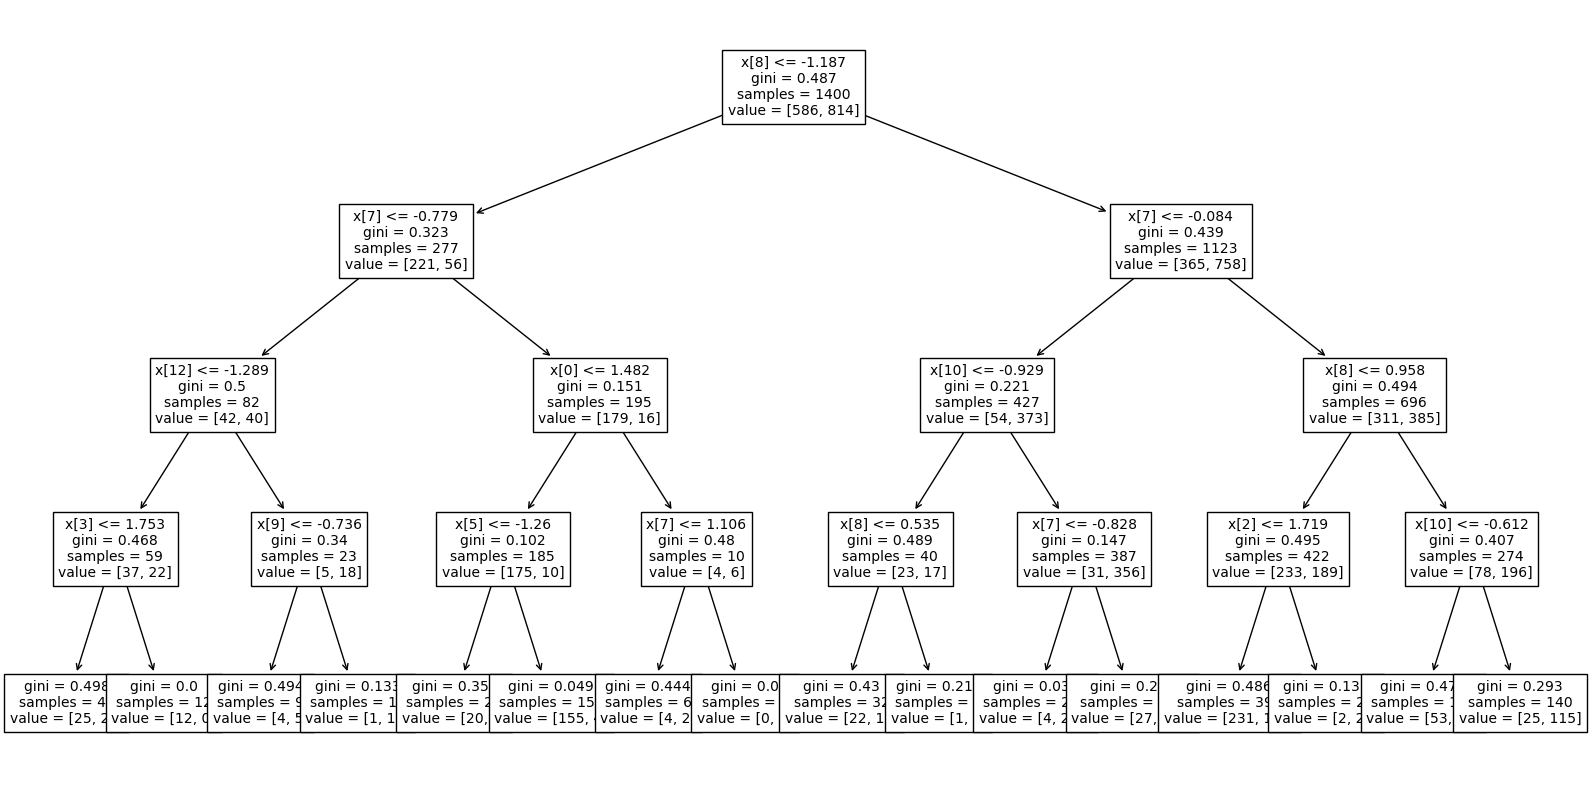

In [39]:
# visualisasi menggunakan tree
import matplotlib.pyplot as plt
from sklearn import tree

plt.subplots(figsize = (20, 10))
tree.plot_tree(model, fontsize=10)
plt.show()

In [32]:
# prediksi data testing
predict = model.predict(x_test)

In [33]:
# model akurasi
from sklearn.metrics import accuracy_score
print("Accuracy score: ", accuracy_score(y_test,predict) * 100)

Accuracy score:  71.0
